In [81]:
import os
import sys
sys.path.append(os.path.abspath('../../..')) 
from plotting_utils import *

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as st
import seaborn as sns

%matplotlib inline
set_matplotlib_style()



In [82]:
RL_START_STEP = 500000

In [83]:
data_path = '../../discrete-mbrl-model-free_data.csv'
df = pd.read_csv(data_path)
df = df[df['step'] > RL_START_STEP]
df



,x_pos,y_pos,direction,step,carry_key,door_unlocked,codebook_size,filter_size,env_name,ae_model_type,rl_start_step,ae_recon_loss,env_max_steps,count,beta,learning_rate,rm_reward,run_id
500050,1,5,2,500001.0,False,False,256,6,minigrid-door-key-stochastic,vqvae,500000,True,100,True,0.01,0.00003,True,8umadp2g
500051,1,5,1,500002.0,False,False,256,6,minigrid-door-key-stochastic,vqvae,500000,True,100,True,0.01,0.00003,True,8umadp2g
500052,1,5,1,500003.0,False,False,256,6,minigrid-door-key-stochastic,vqvae,500000,True,100,True,0.01,0.00003,True,8umadp2g
500053,1,5,0,500004.0,False,False,256,6,minigrid-door-key-stochastic,vqvae,500000,True,100,True,0.01,0.00003,True,8umadp2g
500054,1,5,0,500005.0,False,False,256,6,minigrid-door-key-stochastic,vqvae,500000,True,100,True,0.01,0.00003,True,8umadp2g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24006979,5,2,3,1000187.0,True,True,256,6,minigrid-door-key-stochastic,vqvae,500000,True,100,True,0.01,0.00003,True,9lt1k4na
24006980,5,1,3,1000188.0,True,True,256,6,minigrid-door-key-stochastic,vqvae,500000,True,100,True,0.01,0.00003,True,9lt1k4na
24006981,5,1,0,1000189.0,True,True,256,6,minigrid-door-key-stochastic,vqvae,500000,True,100,True,0.01,0.00003,True,9lt1k4na
24006982,5,1,1,1000190.0,True,True,256,6,minigrid-door-key-stochastic,vqvae,500000,True,100,True,0.01,0.00003,True,9lt1k4na


beta = 0.0

In [84]:
data_path = '../../sampled_data.csv'
df = pd.read_csv(data_path)
df = df[df['step'] > RL_START_STEP]
df



,x_pos,y_pos,direction,step,carry_key,door_unlocked,codebook_size,filter_size,env_name,ae_model_type,rl_start_step,ae_recon_loss,env_max_steps,count,beta,learning_rate,rm_reward,run_id
500114.0,1,5,1,500039.0,True,False,256,6,minigrid-door-key-stochastic,vqvae,500000,True,1000,True,0.001,0.00003,True,lsls4gmz
500171.0,1,6,1,500096.0,True,False,256,6,minigrid-door-key-stochastic,vqvae,500000,True,1000,True,0.001,0.00003,True,lsls4gmz
500235.0,3,4,2,500160.0,True,False,256,6,minigrid-door-key-stochastic,vqvae,500000,True,1000,True,0.001,0.00003,True,lsls4gmz
500346.0,3,2,0,500271.0,True,False,256,6,minigrid-door-key-stochastic,vqvae,500000,True,1000,True,0.001,0.00003,True,lsls4gmz
500387.0,3,1,2,500312.0,True,False,256,6,minigrid-door-key-stochastic,vqvae,500000,True,1000,True,0.001,0.00003,True,lsls4gmz
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999969.0,2,4,2,999821.0,False,False,256,6,minigrid-door-key-stochastic,vqvae,500000,True,100,True,0.000,0.00003,False,acltcgzd
1000155.0,3,5,1,1000005.0,False,False,256,6,minigrid-door-key-stochastic,vqvae,500000,True,100,True,0.000,0.00003,False,acltcgzd
1000206.0,3,6,1,1000056.0,False,False,256,6,minigrid-door-key-stochastic,vqvae,500000,True,100,True,0.000,0.00003,False,acltcgzd
1000242.0,2,4,0,1000092.0,False,False,256,6,minigrid-door-key-stochastic,vqvae,500000,True,100,True,0.000,0.00003,False,acltcgzd


In [85]:
label_map = {0.0: "PPO", 0.001: "beta = 0.001", 0.01: "beta = 0.01", 0.0001: "beta = 0.0001"}
df_binned = df
df_binned["step_bin"] = (df_binned["step"] // 1000 + 1) * 1000
df_binned

,x_pos,y_pos,direction,step,carry_key,door_unlocked,codebook_size,filter_size,env_name,ae_model_type,rl_start_step,ae_recon_loss,env_max_steps,count,beta,learning_rate,rm_reward,run_id,step_bin
500114.0,1,5,1,500039.0,True,False,256,6,minigrid-door-key-stochastic,vqvae,500000,True,1000,True,0.001,0.00003,True,lsls4gmz,501000.0
500171.0,1,6,1,500096.0,True,False,256,6,minigrid-door-key-stochastic,vqvae,500000,True,1000,True,0.001,0.00003,True,lsls4gmz,501000.0
500235.0,3,4,2,500160.0,True,False,256,6,minigrid-door-key-stochastic,vqvae,500000,True,1000,True,0.001,0.00003,True,lsls4gmz,501000.0
500346.0,3,2,0,500271.0,True,False,256,6,minigrid-door-key-stochastic,vqvae,500000,True,1000,True,0.001,0.00003,True,lsls4gmz,501000.0
500387.0,3,1,2,500312.0,True,False,256,6,minigrid-door-key-stochastic,vqvae,500000,True,1000,True,0.001,0.00003,True,lsls4gmz,501000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999969.0,2,4,2,999821.0,False,False,256,6,minigrid-door-key-stochastic,vqvae,500000,True,100,True,0.000,0.00003,False,acltcgzd,1000000.0
1000155.0,3,5,1,1000005.0,False,False,256,6,minigrid-door-key-stochastic,vqvae,500000,True,100,True,0.000,0.00003,False,acltcgzd,1001000.0
1000206.0,3,6,1,1000056.0,False,False,256,6,minigrid-door-key-stochastic,vqvae,500000,True,100,True,0.000,0.00003,False,acltcgzd,1001000.0
1000242.0,2,4,0,1000092.0,False,False,256,6,minigrid-door-key-stochastic,vqvae,500000,True,100,True,0.000,0.00003,False,acltcgzd,1001000.0


         run_id  beta   step_bin  rm_reward  env_max_steps  carry_key_count  \
1503   0jiyni1t  0.01   501000.0      False            100      9895.120000   
1504   0jiyni1t  0.01   502000.0      False            100     10546.946903   
1505   0jiyni1t  0.01   503000.0      False            100     10850.930693   
1506   0jiyni1t  0.01   504000.0      False            100     12513.991304   
1507   0jiyni1t  0.01   505000.0      False            100     10614.057143   
...         ...   ...        ...        ...            ...              ...   
71721  xj1zq2s6  0.00   997000.0      False            100      3267.545455   
71722  xj1zq2s6  0.00   998000.0      False            100      3499.117647   
71723  xj1zq2s6  0.00   999000.0      False            100      3106.423423   
71724  xj1zq2s6  0.00  1000000.0      False            100      3378.193878   
71725  xj1zq2s6  0.00  1001000.0      False            100      2996.875000   

       door_unlocked_count  
1503           3579.55

/var/folders/29/w5w0jfxj159bsbfcwqj2081m0000gn/T/ipykernel_99251/786992574.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  group['beta_label'] = group['beta'].map(label_map)


$\times\mathdefault{10^{6}}\mathdefault{}$


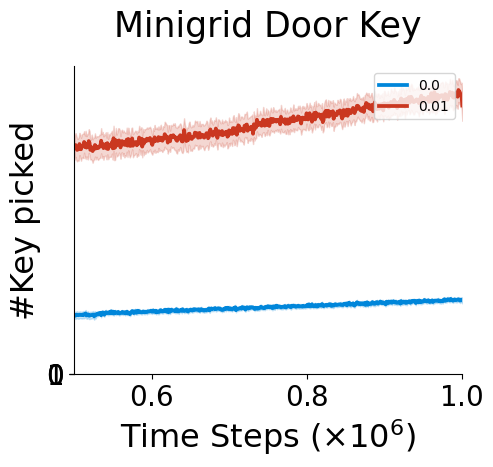

In [86]:
label_map = {0.0: "PPO", 0.001: "beta = 0.001", 0.01: "beta = 0.01", 0.0001: "beta = 0.0001"}
df_binned = df
df_binned["step_bin"] = (df_binned["step"] // 1000 + 1) * 1000  # Floors to the nearest 1,000

df_binned["door_unlocked"] = df_binned["door_unlocked"].astype(int)
df_binned["carry_key"] = df_binned["carry_key"].astype(int)


df_binned["carry_key_count"] = df_binned.groupby("run_id")["carry_key"].cumsum()
df_binned["door_unlocked_count"] = df_binned.groupby("run_id")["door_unlocked"].cumsum()

df_binned = df.groupby(['run_id', 'beta', 'step_bin', 'rm_reward', 'env_max_steps' ], as_index=False)[["carry_key_count", 'door_unlocked_count']].mean()

determ_env_df = df_binned
determ_env_df = determ_env_df[determ_env_df['env_max_steps'] == 100 ]

print(determ_env_df)




set_matplotlib_style(style='4-row')

env_name = "Minigrid Door Key"
group = determ_env_df

group['beta_label'] = group['beta'].map(label_map)

rl_start_step = RL_START_STEP
max_step = 10e5

len_classes = 2
color_palette = get_color_palette(n=len_classes)
sns.lineplot(
    group, x='step_bin', y='carry_key_count', hue='beta',
    errorbar=t_distrib, palette=color_palette)
  
#   plt.axvline(x=rl_start_step, color='black', linestyle='--', alpha=0.3, linewidth=2)
  
plt.title(f'{standardize_env_name(env_name)}')
set_fig_labels('Time Steps', '#Key picked', xsci=True, order=6)
plt.xlim(rl_start_step, max_step)
  
max_y = 1
# plt.ylim(0, 2e5)
plt.gca().set_yticks([0, max_y // 2, max_y])
plt.legend(loc='upper right')





save_fig_versions(f'{standardize_env_name(env_name)}_delayed_rl_ep_len', type='png',dir='../../../figures/png')
plt.show()

        run_id  beta   step_bin  rm_reward  env_max_steps  carry_key_count  \
204   0lqeedmo   0.0   510000.0       True            100      2884.566860   
205   0lqeedmo   0.0   520000.0       True            100      2946.864307   
206   0lqeedmo   0.0   530000.0       True            100      2941.109166   
207   0lqeedmo   0.0   540000.0       True            100      2916.679188   
208   0lqeedmo   0.0   550000.0       True            100      3126.979571   
...        ...   ...        ...        ...            ...              ...   
7193  ws42zhmg   0.0   970000.0       True            100      3592.350760   
7194  ws42zhmg   0.0   980000.0       True            100      3533.946026   
7195  ws42zhmg   0.0   990000.0       True            100      3427.851324   
7196  ws42zhmg   0.0  1000000.0       True            100      3544.792695   
7197  ws42zhmg   0.0  1010000.0       True            100      3213.375000   

      door_unlocked_count  
204            100.585271  
205    

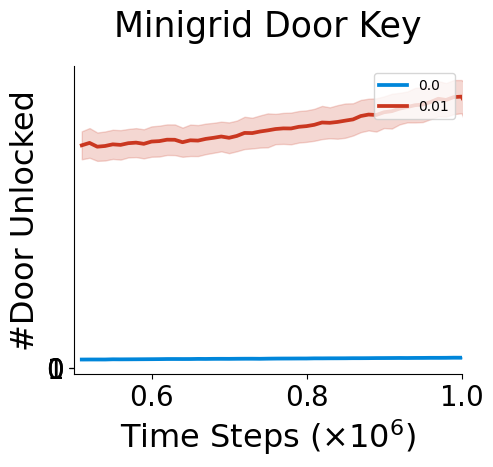

In [87]:
label_map = {0.0: "PPO", 0.001: "beta = 0.001", 0.01: "beta = 0.01", 0.0001: "beta = 0.0001"}
df_binned = df
df_binned["step_bin"] = (df_binned["step"] // 10000 + 1) * 10000  # Floors to the nearest 1,000

df_binned["door_unlocked"] = df_binned["door_unlocked"].astype(int)
df_binned["carry_key"] = df_binned["carry_key"].astype(int)


df_binned["carry_key_count"] = df_binned.groupby("run_id")["carry_key"].cumsum()
df_binned["door_unlocked_count"] = df_binned.groupby("run_id")["door_unlocked"].cumsum()

df_binned = df.groupby(['run_id', 'beta', 'step_bin', 'rm_reward', 'env_max_steps' ], as_index=False)[["carry_key_count", 'door_unlocked_count']].mean()

determ_env_df = df_binned
determ_env_df = determ_env_df[determ_env_df['env_max_steps'] == 100 ]
determ_env_df = determ_env_df[determ_env_df['rm_reward'] == True]

print(determ_env_df)




set_matplotlib_style(style='4-row')

env_name = "Minigrid Door Key"
group = determ_env_df

group['beta_label'] = group['beta'].map(label_map)

rl_start_step = RL_START_STEP
max_step = 10e5

len_classes = 2
color_palette = get_color_palette(n=len_classes)
sns.lineplot(
    group, x='step_bin', y='door_unlocked_count', hue='beta',
    errorbar=t_distrib, palette=color_palette)
  
#   plt.axvline(x=rl_start_step, color='black', linestyle='--', alpha=0.3, linewidth=2)
  
plt.title(f'{standardize_env_name(env_name)}')
set_fig_labels('Time Steps', '#Door Unlocked', xsci=True, order=6)
plt.xlim(rl_start_step, max_step)
  
max_y = 1
# plt.ylim(0, 2e5)
plt.gca().set_yticks([0, max_y // 2, max_y])
plt.legend(loc='upper right')





save_fig_versions(f'{standardize_env_name(env_name)}_delayed_rl_ep_len', type='png',dir='../../../figures/png')
plt.show()

In [88]:
def compute_unique_states_count(df):
    """
    Groups the dataframe by run_id and computes a new column 'unique_states_count'
    which tracks the number of unique (x_pos, y_pos) pairs seen up to each step.

    Args:
        df (pd.DataFrame): DataFrame containing 'run_id', 'step', 'x_pos', and 'y_pos'.

    Returns:
        pd.DataFrame: Modified DataFrame with 'unique_states_count' column.
    """
    # Ensure data is sorted by step within each run_id
    df = df.sort_values(by=['run_id', 'step']).copy()

    # Container for results
    unique_counts_list = []

    # Process each run_id separately
    for run_id, group in df.groupby('run_id', sort=False):
        seen_states = set()
        unique_counts = []

        for _, row in group.iterrows():
            state = (row['x_pos'], row['y_pos'], row['carry_key'], row['door_unlocked'], row['direction'])
            seen_states.add(state)
            unique_counts.append(len(seen_states))

        # Store results
        unique_counts_list.extend(unique_counts)

    # Assign new column
    df['unique_states_count'] = unique_counts_list
    return df


In [89]:
label_map = {0.0: "PPO", 0.001: "beta = 0.001", 0.01: "beta = 0.01", 0.0001: "beta = 0.0001"}

determ_env_df = df
determ_env_df = determ_env_df[determ_env_df['env_max_steps'] == 100 ]
determ_env_df = determ_env_df[determ_env_df['rm_reward'] == True]

determ_env_df = compute_unique_states_count(determ_env_df)

/var/folders/29/w5w0jfxj159bsbfcwqj2081m0000gn/T/ipykernel_99251/629267159.py:13: UserWarning: The palette list has more values (3) than needed (2), which may not be intended.
  sns.lineplot(


$\times\mathdefault{10^{6}}\mathdefault{}$


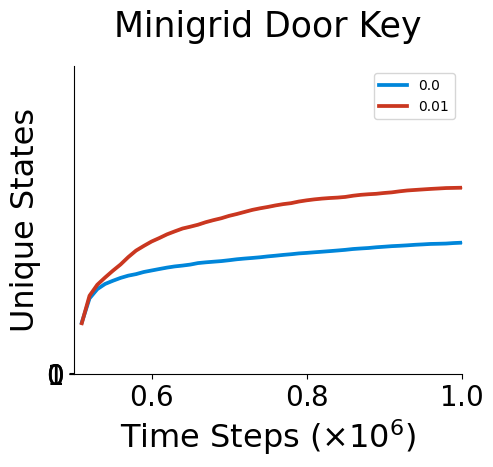

In [90]:
set_matplotlib_style(style='4-row')

env_name = "Minigrid Door Key"
group = determ_env_df

group['beta_label'] = group['beta'].map(label_map)

rl_start_step = RL_START_STEP
max_step = 10e5

len_classes = 3
color_palette = get_color_palette(n=len_classes)
sns.lineplot(
    group, x='step_bin', y='unique_states_count', hue='beta',
    errorbar=t_distrib, palette=color_palette)
  
#   plt.axvline(x=rl_start_step, color='black', linestyle='--', alpha=0.3, linewidth=2)
  
plt.title(f'{standardize_env_name(env_name)}')
set_fig_labels('Time Steps', 'Unique States', xsci=True, order=6)
plt.xlim(rl_start_step, max_step)
  
max_y = 1
plt.ylim(0, 500)
plt.gca().set_yticks([0, max_y // 2, max_y])
plt.legend(loc='upper right')





save_fig_versions(f'{standardize_env_name(env_name)}_delayed_rl_ep_len', type='png',dir='../../../figures/png')
plt.show()

In [91]:
label_map = {0.0: "PPO", 0.001: "beta = 0.001", 0.01: "beta = 0.01", 0.0001: "beta = 0.0001"}

determ_env_df = df
determ_env_df = determ_env_df[determ_env_df['env_max_steps'] == 1000 ]
determ_env_df = determ_env_df[determ_env_df['rm_reward'] == True]

determ_env_df = compute_unique_states_count(determ_env_df)

/var/folders/29/w5w0jfxj159bsbfcwqj2081m0000gn/T/ipykernel_99251/629267159.py:13: UserWarning: The palette list has more values (3) than needed (2), which may not be intended.
  sns.lineplot(


$\times\mathdefault{10^{6}}\mathdefault{}$


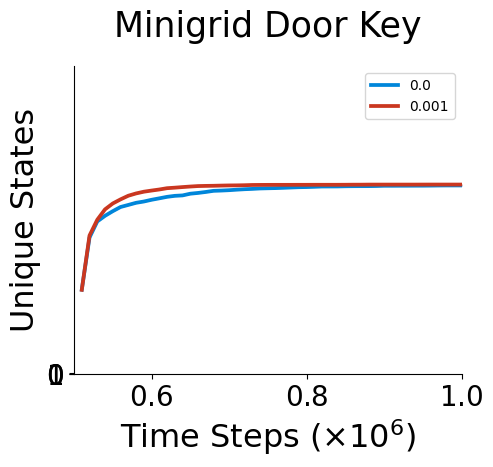

In [92]:
set_matplotlib_style(style='4-row')

env_name = "Minigrid Door Key"
group = determ_env_df

group['beta_label'] = group['beta'].map(label_map)

rl_start_step = RL_START_STEP
max_step = 10e5

len_classes = 3
color_palette = get_color_palette(n=len_classes)
sns.lineplot(
    group, x='step_bin', y='unique_states_count', hue='beta',
    errorbar=t_distrib, palette=color_palette)
  
#   plt.axvline(x=rl_start_step, color='black', linestyle='--', alpha=0.3, linewidth=2)
  
plt.title(f'{standardize_env_name(env_name)}')
set_fig_labels('Time Steps', 'Unique States', xsci=True, order=6)
plt.xlim(rl_start_step, max_step)
  
max_y = 1
plt.ylim(0, 500)
plt.gca().set_yticks([0, max_y // 2, max_y])
plt.legend(loc='upper right')





save_fig_versions(f'{standardize_env_name(env_name)}_delayed_rl_ep_len', type='png',dir='../../../figures/png')
plt.show()

# Heatmap

In [93]:
def get_groups(df):
    df_nkey_ndoor = df.loc[df["door_unlocked"] == False]
    df_nkey_ndoor = df_nkey_ndoor.loc[df_nkey_ndoor["carry_key"] == False]
    df_nkey_ndoor
    

    df_key_ndoor = df.loc[df["door_unlocked"] == False]
    df_key_ndoor = df_key_ndoor.loc[df_key_ndoor["carry_key"] == True]
    df_key_ndoor

    df_key_door = df.loc[df["door_unlocked"] == True]
    df_key_door = df_key_door.loc[df_key_door["carry_key"] == True]
    df_key_door 

    grouped = [df_nkey_ndoor, df_key_ndoor, df_key_door]

    return grouped


577174
882994
690520


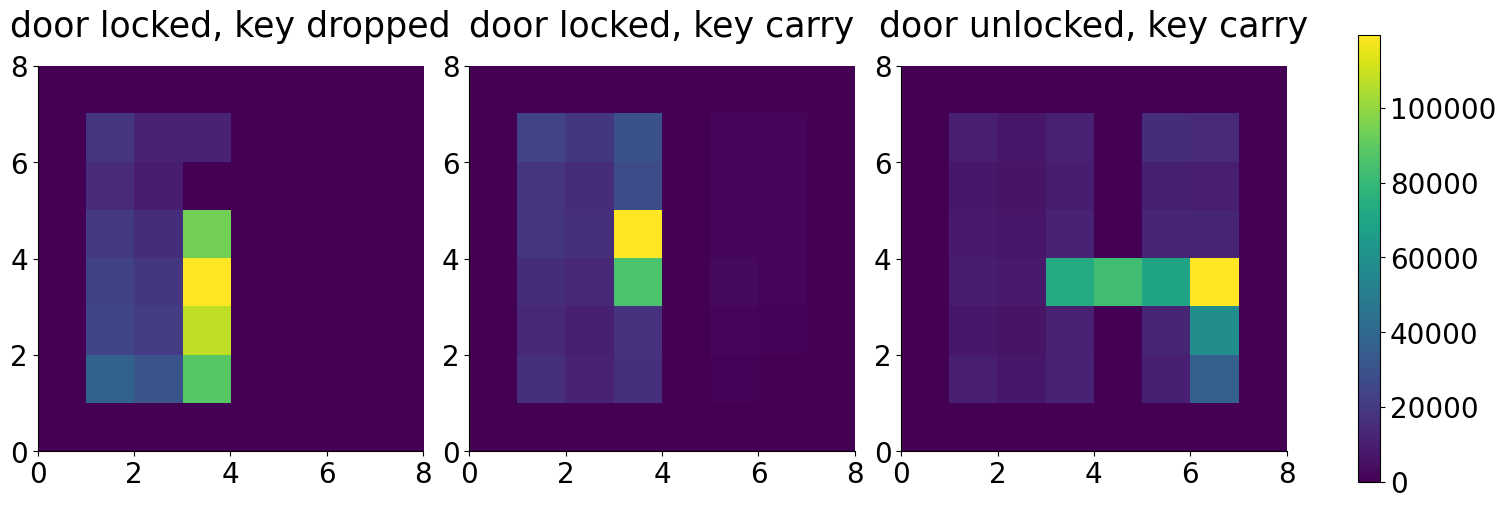

In [94]:
determ_env_df = df[df['beta'] == 0.001]
grouped = get_groups(determ_env_df)

x = df['x_pos']
y = df['y_pos']
heatmap, xs, ys = np.histogram2d(x, y, bins=[8, 8], range=[[0, 8], [0, 8]])
heatmap = heatmap.T
max_count = np.max(heatmap)


i = 0
n_groups = 3
fig, axes = plt.subplots(1, n_groups, figsize=(5 * n_groups, 5), constrained_layout=True)
titles = ["door locked, key dropped", "door locked, key carry", "door unlocked, key carry"]

for group in grouped:
    print(len(group))
    group = group[['y_pos', 'x_pos']]
    group = group.to_numpy()
    
    # Pivot the data for heatmap
    x = group[:, 1]
    y = np.abs(group[:, 0] - 7)
    heatmap, xs, ys = np.histogram2d(x, y, bins=[8, 8], range=[[0, 8], [0, 8]])
    h = axes[i].imshow(heatmap.T, interpolation='nearest', origin='lower',
        extent=[0, 8, 0, 8])
    
    axes[i].set_title(titles[i])    

    i += 1
    if i >= n_groups:
        break



    # the actual x-axis and y-axis are from 0 to 19
    # we want to put 11 ticks on the axis
    # ax.set_xticks(np.linspace(0,7, 8))
    # ax.set_yticks(np.linspace(0,7, 8))

fig.colorbar(h, ax=axes)

plt.show()


# Show the plot

## First phase

Plot visitation count for first 50K steps of learning

### PPO with count (beta == 0.001)

In [ ]:
data_path = '../../sampled_data.csv'
df = pd.read_csv(data_path)
df = df[df['step'] > RL_START_STEP]

In [138]:
determ_env_df = df[df['step'] < 520000 ]
determ_env_df = determ_env_df[determ_env_df['rm_reward'] == False]
determ_env_df = determ_env_df[determ_env_df['env_max_steps'] == 1000]
determ_env_df = determ_env_df[determ_env_df['beta'] == 0.001]
determ_env_df

,x_pos,y_pos,direction,step,carry_key,door_unlocked,codebook_size,filter_size,env_name,ae_model_type,rl_start_step,ae_recon_loss,env_max_steps,count,beta,learning_rate,rm_reward,run_id
500082.0,3,1,3,500007.0,True,False,256,6,minigrid-door-key-stochastic,vqvae,500000,True,1000,True,0.001,0.00003,False,cfgu9xaw
500166.0,3,6,2,500091.0,True,False,256,6,minigrid-door-key-stochastic,vqvae,500000,True,1000,True,0.001,0.00003,False,cfgu9xaw
500217.0,1,6,3,500142.0,True,False,256,6,minigrid-door-key-stochastic,vqvae,500000,True,1000,True,0.001,0.00003,False,cfgu9xaw
500364.0,1,5,3,500289.0,True,False,256,6,minigrid-door-key-stochastic,vqvae,500000,True,1000,True,0.001,0.00003,False,cfgu9xaw
500463.0,2,5,1,500388.0,True,False,256,6,minigrid-door-key-stochastic,vqvae,500000,True,1000,True,0.001,0.00003,False,cfgu9xaw
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
519502.0,1,5,1,519426.0,True,False,256,6,minigrid-door-key-stochastic,vqvae,500000,True,1000,True,0.001,0.00003,False,m3omtlt6
519588.0,1,6,0,519512.0,True,False,256,6,minigrid-door-key-stochastic,vqvae,500000,True,1000,True,0.001,0.00003,False,m3omtlt6
519647.0,1,3,0,519571.0,True,False,256,6,minigrid-door-key-stochastic,vqvae,500000,True,1000,True,0.001,0.00003,False,m3omtlt6
519802.0,3,1,2,519726.0,True,True,256,6,minigrid-door-key-stochastic,vqvae,500000,True,1000,True,0.001,0.00003,False,m3omtlt6


In [151]:
def get_plots(determ_env_df):
    grouped = get_groups(determ_env_df)

    x = df['x_pos']
    y = df['y_pos']
    heatmap, xs, ys = np.histogram2d(x, y, bins=[8, 8], range=[[0, 8], [0, 8]])
    heatmap = heatmap.T
    max_count = np.max(heatmap)


    i = 0
    n_groups = 3
    fig, axes = plt.subplots(1, n_groups, figsize=(5 * n_groups, 5), constrained_layout=True)
    titles = ["door locked, key dropped", "door locked, key carry", "door unlocked, key carry"]

    # Calculate the sum for probability
    sum = 0
    for group in grouped:
        group = group[['y_pos', 'x_pos']]
        group = group.to_numpy()
        
        # Pivot the data for heatmap
        x = group[:, 1]
        y = np.abs(group[:, 0] - 7)
        heatmap, xs, ys = np.histogram2d(x, y, bins=[8, 8], range=[[0, 8], [0, 8]])
        sum += np.sum(heatmap)


    for group in grouped:
        print(len(group))
        group = group[['y_pos', 'x_pos']]
        group = group.to_numpy()
        
        # Pivot the data for heatmap
        x = group[:, 1]
        y = np.abs(group[:, 0] - 7)
        heatmap, xs, ys = np.histogram2d(x, y, bins=[8, 8], range=[[0, 8], [0, 8]])

        probabilities = heatmap / sum


        h = axes[i].imshow(
            probabilities.T, 
            interpolation='nearest',
            origin='lower',
            extent=[0, 8, 0, 8],
            cmap='viridis',
            vmin=0,
            vmax=0.05
        )

        for row in range(probabilities.shape[0]):
            for col in range(probabilities.shape[1]):
                axes[i].text(
                    col + 0.5, row + 0.5,  # Position in the center of the cell
                    f"{probabilities[col, row]:.2f}",  # Format probability
                    ha='center', va='center', color='white'
                )
        
        axes[i].set_title(titles[i])
        # axes[i].grid(color='white', linestyle='-', linewidth=0.7)   

        i += 1
        if i >= n_groups:
            break



    plt.show()

35540
58184
26313


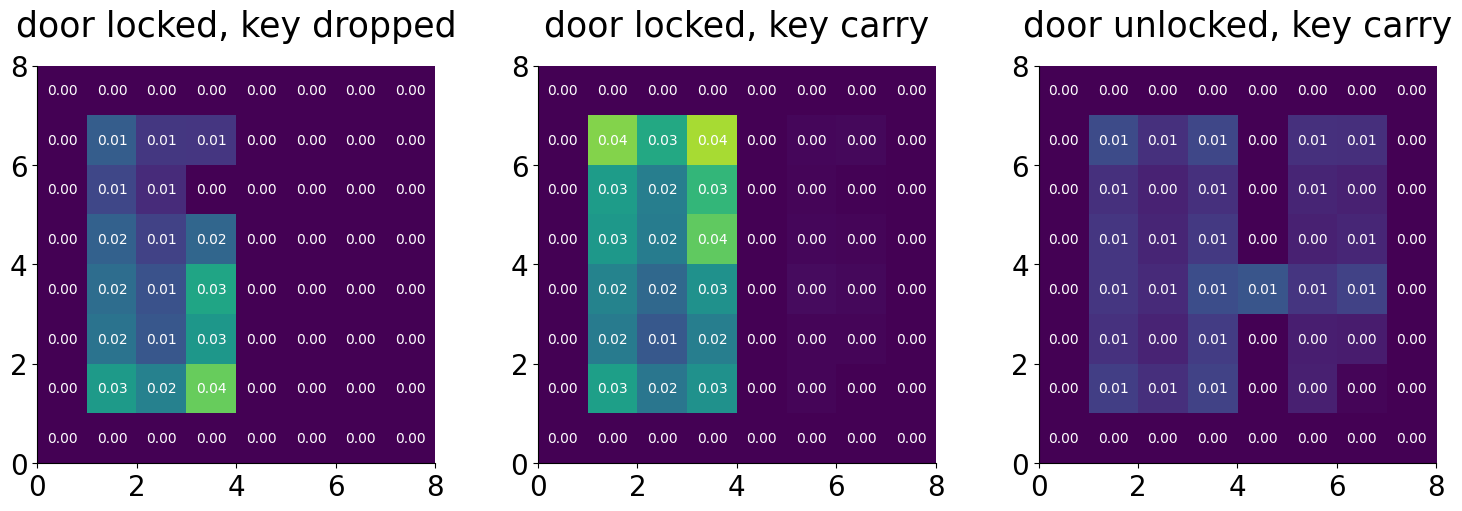

In [152]:
get_plots(determ_env_df)

### PPO

In [153]:
determ_env_df = df[df['step'] < 520000 ]
determ_env_df = determ_env_df[determ_env_df['rm_reward'] == False]
determ_env_df = determ_env_df[determ_env_df['env_max_steps'] == 1000]
determ_env_df = determ_env_df[determ_env_df['beta'] == 0.0]
determ_env_df

,x_pos,y_pos,direction,step,carry_key,door_unlocked,codebook_size,filter_size,env_name,ae_model_type,rl_start_step,ae_recon_loss,env_max_steps,count,beta,learning_rate,rm_reward,run_id
500079.0,2,3,0,500004.0,False,False,256,6,minigrid-door-key-stochastic,vqvae,500000,True,1000,True,0.0,0.0003,False,g2ldnib5
500197.0,3,1,0,500122.0,False,False,256,6,minigrid-door-key-stochastic,vqvae,500000,True,1000,True,0.0,0.0003,False,g2ldnib5
500555.0,2,6,3,500480.0,False,False,256,6,minigrid-door-key-stochastic,vqvae,500000,True,1000,True,0.0,0.0003,False,g2ldnib5
500755.0,1,6,2,500680.0,False,False,256,6,minigrid-door-key-stochastic,vqvae,500000,True,1000,True,0.0,0.0003,False,g2ldnib5
500810.0,3,6,0,500735.0,False,False,256,6,minigrid-door-key-stochastic,vqvae,500000,True,1000,True,0.0,0.0003,False,g2ldnib5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
519792.0,3,5,0,519716.0,True,False,256,6,minigrid-door-key-stochastic,vqvae,500000,True,1000,True,0.0,0.0003,False,gfv7f1g7
519850.0,3,6,1,519774.0,True,False,256,6,minigrid-door-key-stochastic,vqvae,500000,True,1000,True,0.0,0.0003,False,gfv7f1g7
519888.0,2,4,2,519812.0,True,False,256,6,minigrid-door-key-stochastic,vqvae,500000,True,1000,True,0.0,0.0003,False,gfv7f1g7
519940.0,2,2,1,519864.0,True,False,256,6,minigrid-door-key-stochastic,vqvae,500000,True,1000,True,0.0,0.0003,False,gfv7f1g7


8949
16182
6415


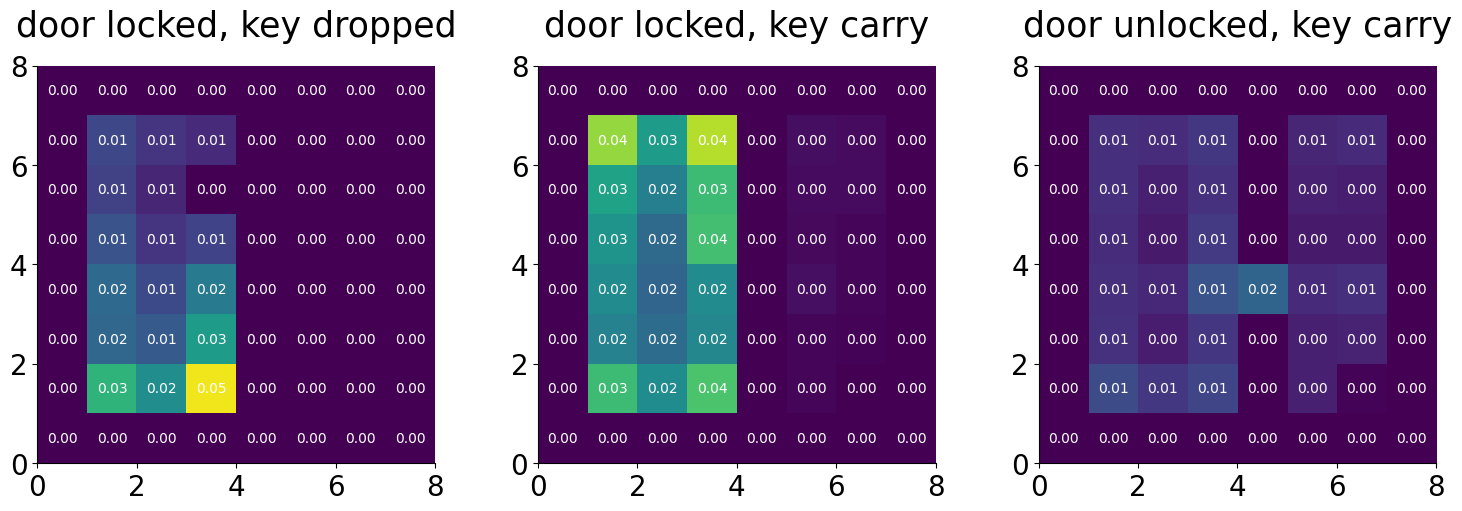

In [154]:
get_plots(determ_env_df)

8949
16182
6415


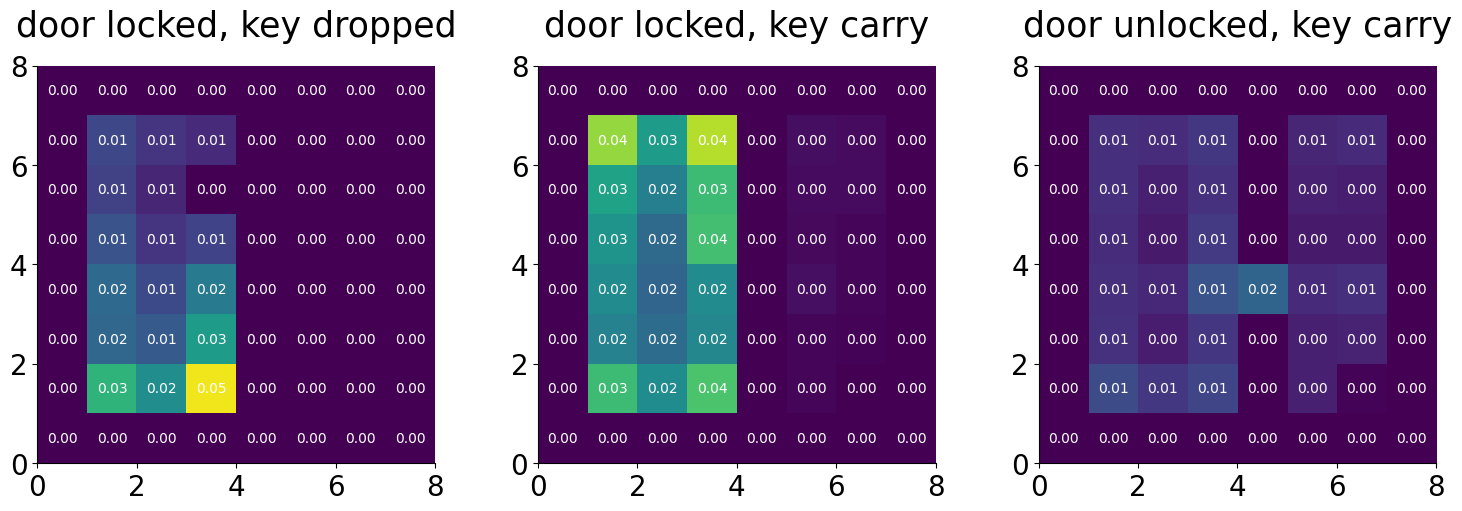

In [143]:
grouped = get_groups(determ_env_df)

x = df['x_pos']
y = df['y_pos']
heatmap, xs, ys = np.histogram2d(x, y, bins=[8, 8], range=[[0, 8], [0, 8]])
heatmap = heatmap.T
max_count = np.max(heatmap)


i = 0
n_groups = 3
fig, axes = plt.subplots(1, n_groups, figsize=(5 * n_groups, 5), constrained_layout=True)
titles = ["door locked, key dropped", "door locked, key carry", "door unlocked, key carry"]

# Calculate the sum for probability
sum = 0
for group in grouped:
    group = group[['y_pos', 'x_pos']]
    group = group.to_numpy()
    
    # Pivot the data for heatmap
    x = group[:, 1]
    y = np.abs(group[:, 0] - 7)
    heatmap, xs, ys = np.histogram2d(x, y, bins=[8, 8], range=[[0, 8], [0, 8]])
    sum += np.sum(heatmap)


for group in grouped:
    print(len(group))
    group = group[['y_pos', 'x_pos']]
    group = group.to_numpy()
    
    # Pivot the data for heatmap
    x = group[:, 1]
    y = np.abs(group[:, 0] - 7)
    heatmap, xs, ys = np.histogram2d(x, y, bins=[8, 8], range=[[0, 8], [0, 8]])

    probabilities = heatmap / sum


    h = axes[i].imshow(
        probabilities.T,  # Transpose to match heatmap orientation
        interpolation='nearest',
        origin='lower',
        extent=[0, 8, 0, 8],
        cmap='viridis',
        vmin=0,
        vmax=0.05
    )

    for row in range(probabilities.shape[0]):
        for col in range(probabilities.shape[1]):
            axes[i].text(
                col + 0.5, row + 0.5,  # Position in the center of the cell
                f"{probabilities[col, row]:.2f}",  # Format probability
                ha='center', va='center', color='white'
            )
    
    axes[i].set_title(titles[i])    

    i += 1
    if i >= n_groups:
        break



    # the actual x-axis and y-axis are from 0 to 19
    # we want to put 11 ticks on the axis
    # ax.set_xticks(np.linspace(0,7, 8))
    # ax.set_yticks(np.linspace(0,7, 8))

# fig.colorbar(h, ax=axes)

plt.show()

## Second Phase

The first 100K steps of learning

### PPO with count (beta == 0.001)

In [145]:
determ_env_df = df[df['step'] < 550000 ]
determ_env_df = determ_env_df[determ_env_df['beta'] == 0.001]
determ_env_df = determ_env_df[determ_env_df['rm_reward'] == False]

determ_env_df

,x_pos,y_pos,direction,step,carry_key,door_unlocked,codebook_size,filter_size,env_name,ae_model_type,rl_start_step,ae_recon_loss,env_max_steps,count,beta,learning_rate,rm_reward,run_id
500082.0,3,1,3,500007.0,True,False,256,6,minigrid-door-key-stochastic,vqvae,500000,True,1000,True,0.001,0.00003,False,cfgu9xaw
500166.0,3,6,2,500091.0,True,False,256,6,minigrid-door-key-stochastic,vqvae,500000,True,1000,True,0.001,0.00003,False,cfgu9xaw
500217.0,1,6,3,500142.0,True,False,256,6,minigrid-door-key-stochastic,vqvae,500000,True,1000,True,0.001,0.00003,False,cfgu9xaw
500364.0,1,5,3,500289.0,True,False,256,6,minigrid-door-key-stochastic,vqvae,500000,True,1000,True,0.001,0.00003,False,cfgu9xaw
500463.0,2,5,1,500388.0,True,False,256,6,minigrid-door-key-stochastic,vqvae,500000,True,1000,True,0.001,0.00003,False,cfgu9xaw
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
549351.0,1,2,0,549270.0,True,False,256,6,minigrid-door-key-stochastic,vqvae,500000,True,1000,True,0.001,0.00003,False,m3omtlt6
549387.0,2,1,1,549306.0,True,False,256,6,minigrid-door-key-stochastic,vqvae,500000,True,1000,True,0.001,0.00003,False,m3omtlt6
549439.0,3,1,0,549358.0,True,False,256,6,minigrid-door-key-stochastic,vqvae,500000,True,1000,True,0.001,0.00003,False,m3omtlt6
549483.0,3,3,0,549402.0,True,False,256,6,minigrid-door-key-stochastic,vqvae,500000,True,1000,True,0.001,0.00003,False,m3omtlt6


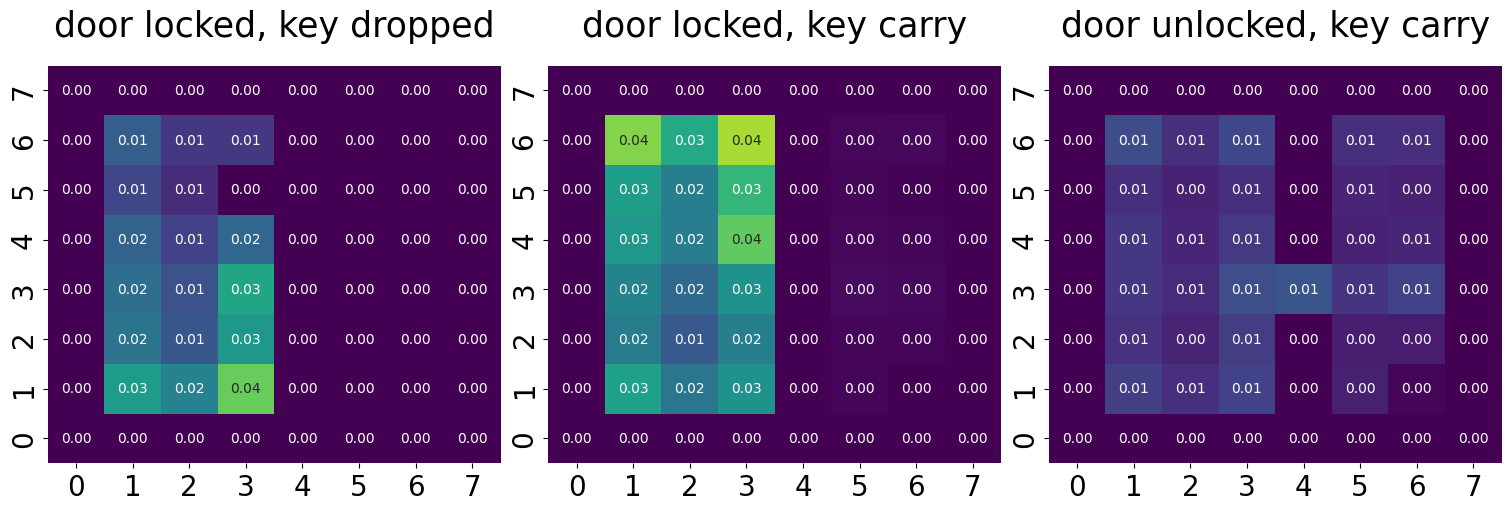

In [146]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Initialize variables

grouped = get_groups(determ_env_df)

n_groups = 3
fig, axes = plt.subplots(1, n_groups, figsize=(5 * n_groups, 5), constrained_layout=True)
titles = ["door locked, key dropped", "door locked, key carry", "door unlocked, key carry"]

# To collect heatmap data for normalization
all_heatmaps = []

for group in grouped:
    group = group[['y_pos', 'x_pos']]
    group = group.to_numpy()

    # Pivot the data for heatmap
    x = group[:, 1]
    y = np.abs(group[:, 0] - 7)
    heatmap, xs, ys = np.histogram2d(x, y, bins=[8, 8], range=[[0, 8], [0, 8]])
    all_heatmaps.append(heatmap)

# Normalize the color range across all heatmaps
vmin = min(h.min() for h in all_heatmaps)
vmax = max(h.max() for h in all_heatmaps)

sum = 0
for i, heatmap in enumerate(all_heatmaps):
    sum += heatmap.sum()

# Plot each heatmap using Seaborn
for i, heatmap in enumerate(all_heatmaps):
    probabilities = heatmap / sum

    sns.heatmap(
        probabilities.T,
        annot=True,  # Add numbers to tiles
        fmt=".2f",   # Format numbers to 2 decimal places
        cmap="viridis",
        cbar=None,
        cbar_ax=None,  # Shared colorbar
        ax=axes[i],
        vmin=0,
        vmax=0.05
    )
    axes[i].set_title(titles[i])
    axes[i].invert_yaxis()  # Invert y-axis to match matrix structure (optional)

plt.show()


### PPO

In [101]:
determ_env_df = df[df['step'] < 700000 ]
determ_env_df = determ_env_df[determ_env_df['beta'] == 0.0]
determ_env_df

,x_pos,y_pos,direction,step,carry_key,door_unlocked,codebook_size,filter_size,env_name,ae_model_type,...,ae_recon_loss,env_max_steps,count,beta,learning_rate,rm_reward,run_id,step_bin,carry_key_count,door_unlocked_count
500247.0,3,3,3,500172.0,1,1,256,6,minigrid-door-key-stochastic,vqvae,...,True,1000,True,0.0,0.00030,True,mejkdwhp,510000.0,1,1
500287.0,1,3,0,500212.0,1,1,256,6,minigrid-door-key-stochastic,vqvae,...,True,1000,True,0.0,0.00030,True,mejkdwhp,510000.0,2,2
500291.0,1,4,1,500216.0,1,1,256,6,minigrid-door-key-stochastic,vqvae,...,True,1000,True,0.0,0.00030,True,mejkdwhp,510000.0,3,3
500372.0,3,5,1,500297.0,1,0,256,6,minigrid-door-key-stochastic,vqvae,...,True,1000,True,0.0,0.00030,True,mejkdwhp,510000.0,4,3
500749.0,3,6,3,500674.0,1,1,256,6,minigrid-door-key-stochastic,vqvae,...,True,1000,True,0.0,0.00030,True,mejkdwhp,510000.0,5,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
699915.0,1,3,2,699812.0,0,0,256,6,minigrid-door-key-stochastic,vqvae,...,True,100,True,0.0,0.00003,False,acltcgzd,700000.0,5432,278
699977.0,3,5,3,699874.0,0,0,256,6,minigrid-door-key-stochastic,vqvae,...,True,100,True,0.0,0.00003,False,acltcgzd,700000.0,5432,278
699981.0,1,5,2,699878.0,0,0,256,6,minigrid-door-key-stochastic,vqvae,...,True,100,True,0.0,0.00003,False,acltcgzd,700000.0,5432,278
699997.0,1,4,0,699894.0,0,0,256,6,minigrid-door-key-stochastic,vqvae,...,True,100,True,0.0,0.00003,False,acltcgzd,700000.0,5432,278


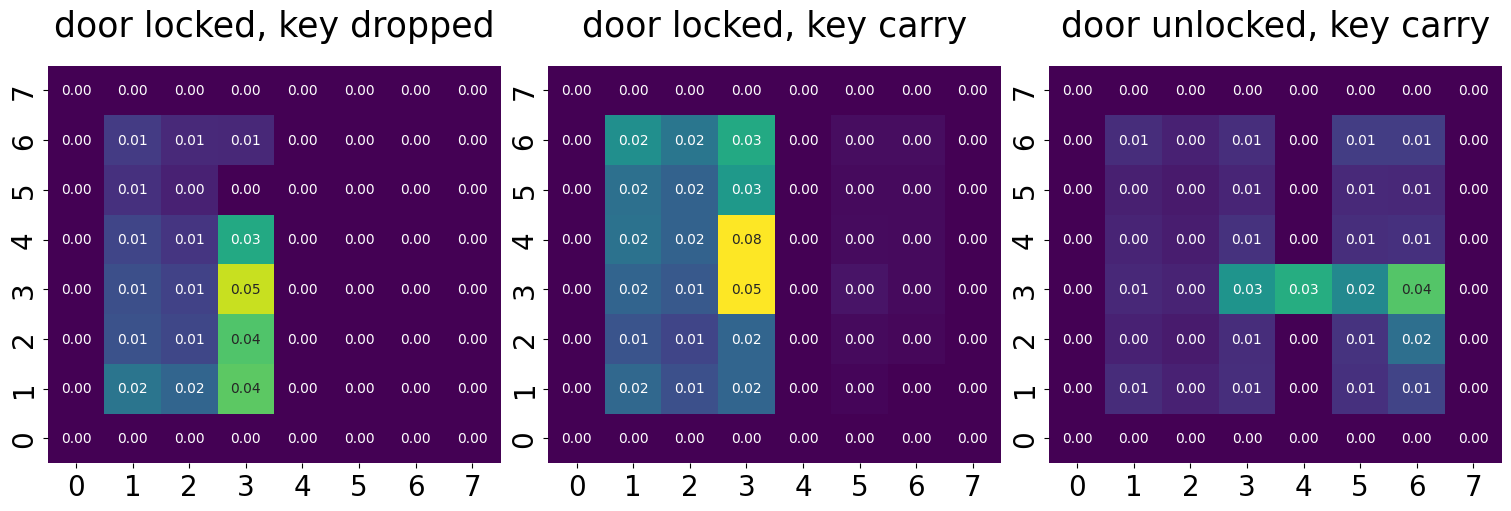

In [102]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Initialize variables
n_groups = 3
fig, axes = plt.subplots(1, n_groups, figsize=(5 * n_groups, 5), constrained_layout=True)
titles = ["door locked, key dropped", "door locked, key carry", "door unlocked, key carry"]

# To collect heatmap data for normalization
all_heatmaps = []

for group in grouped:
    group = group[['y_pos', 'x_pos']]
    group = group.to_numpy()

    # Pivot the data for heatmap
    x = group[:, 1]
    y = np.abs(group[:, 0] - 7)
    heatmap, xs, ys = np.histogram2d(x, y, bins=[8, 8], range=[[0, 8], [0, 8]])
    all_heatmaps.append(heatmap)

# Normalize the color range across all heatmaps
vmin = min(h.min() for h in all_heatmaps)
vmax = max(h.max() for h in all_heatmaps)

sum = 0
for i, heatmap in enumerate(all_heatmaps):
    sum += heatmap.sum()
    
# Plot each heatmap using Seaborn
for i, heatmap in enumerate(all_heatmaps):
    probabilities = heatmap / sum

    sns.heatmap(
        probabilities.T,
        annot=True,  # Add numbers to tiles
        fmt=".2f",   # Format numbers to 2 decimal places
        cmap="viridis",
        cbar=None,
        cbar_ax=None,  # Shared colorbar
        ax=axes[i],
        vmin=0,
        vmax=0.05
    )
    axes[i].set_title(titles[i])
    axes[i].invert_yaxis()  # Invert y-axis to match matrix structure (optional)

plt.show()


## Third Phase

The first 200K steps of learning

### PPO with count (beta == 0.001)

In [103]:
determ_env_df = df[df['step'] < 1000000 ]
determ_env_df = determ_env_df[determ_env_df['beta'] == 0.001]
determ_env_df

,x_pos,y_pos,direction,step,carry_key,door_unlocked,codebook_size,filter_size,env_name,ae_model_type,...,ae_recon_loss,env_max_steps,count,beta,learning_rate,rm_reward,run_id,step_bin,carry_key_count,door_unlocked_count
500114.0,1,5,1,500039.0,1,0,256,6,minigrid-door-key-stochastic,vqvae,...,True,1000,True,0.001,0.00003,True,lsls4gmz,510000.0,1,0
500171.0,1,6,1,500096.0,1,0,256,6,minigrid-door-key-stochastic,vqvae,...,True,1000,True,0.001,0.00003,True,lsls4gmz,510000.0,2,0
500235.0,3,4,2,500160.0,1,0,256,6,minigrid-door-key-stochastic,vqvae,...,True,1000,True,0.001,0.00003,True,lsls4gmz,510000.0,3,0
500346.0,3,2,0,500271.0,1,0,256,6,minigrid-door-key-stochastic,vqvae,...,True,1000,True,0.001,0.00003,True,lsls4gmz,510000.0,4,0
500387.0,3,1,2,500312.0,1,0,256,6,minigrid-door-key-stochastic,vqvae,...,True,1000,True,0.001,0.00003,True,lsls4gmz,510000.0,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999587.0,3,5,2,999439.0,0,0,256,6,minigrid-door-key-stochastic,vqvae,...,True,1000,True,0.001,0.00003,False,m3omtlt6,1000000.0,36508,18153
999775.0,3,5,3,999627.0,0,0,256,6,minigrid-door-key-stochastic,vqvae,...,True,1000,True,0.001,0.00003,False,m3omtlt6,1000000.0,36508,18153
999777.0,3,4,3,999629.0,0,0,256,6,minigrid-door-key-stochastic,vqvae,...,True,1000,True,0.001,0.00003,False,m3omtlt6,1000000.0,36508,18153
999971.0,3,4,0,999823.0,1,1,256,6,minigrid-door-key-stochastic,vqvae,...,True,1000,True,0.001,0.00003,False,m3omtlt6,1000000.0,36509,18154


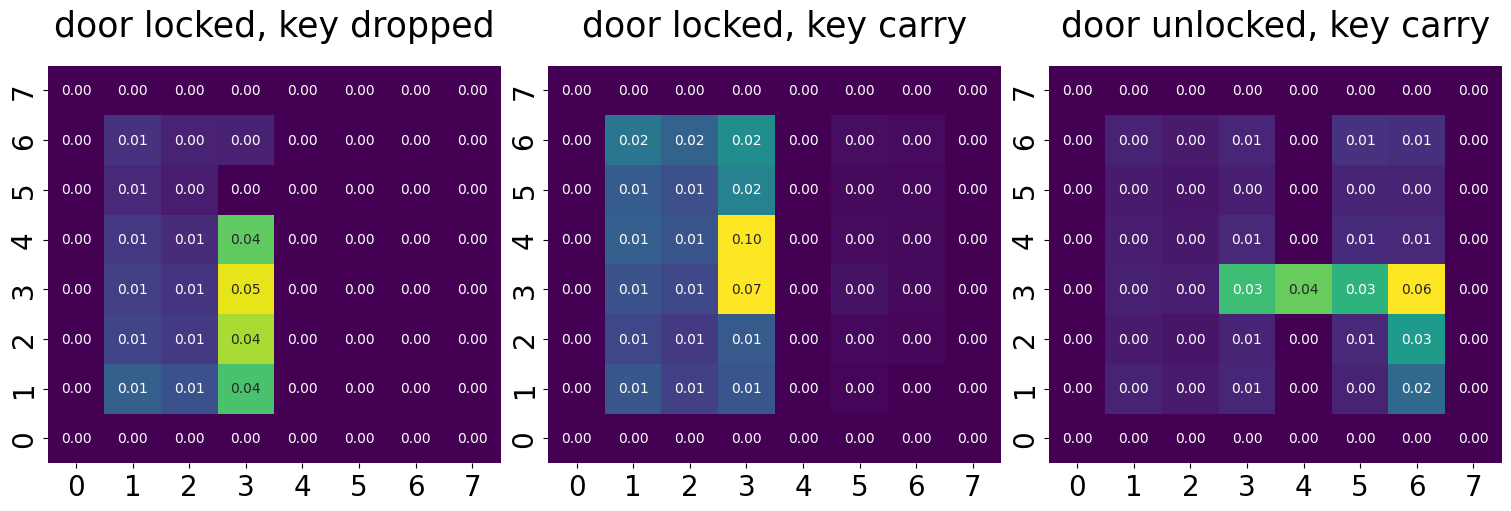

In [104]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Initialize variables
grouped = get_groups(determ_env_df)


n_groups = 3
fig, axes = plt.subplots(1, n_groups, figsize=(5 * n_groups, 5), constrained_layout=True)
titles = ["door locked, key dropped", "door locked, key carry", "door unlocked, key carry"]

# To collect heatmap data for normalization
all_heatmaps = []

for group in grouped:
    group = group[['y_pos', 'x_pos']]
    group = group.to_numpy()

    # Pivot the data for heatmap
    x = group[:, 1]
    y = np.abs(group[:, 0] - 7)
    heatmap, xs, ys = np.histogram2d(x, y, bins=[8, 8], range=[[0, 8], [0, 8]])
    all_heatmaps.append(heatmap)

# Normalize the color range across all heatmaps
vmin = min(h.min() for h in all_heatmaps)
vmax = max(h.max() for h in all_heatmaps)

sum = 0
for i, heatmap in enumerate(all_heatmaps):
    sum += heatmap.sum()

# Plot each heatmap using Seaborn
for i, heatmap in enumerate(all_heatmaps):
    probabilities = heatmap / sum

    sns.heatmap(
        probabilities.T,
        annot=True,  # Add numbers to tiles
        fmt=".2f",   # Format numbers to 2 decimal places
        cmap="viridis",
        cbar=None,
        cbar_ax=None,  # Shared colorbar
        ax=axes[i],
        vmin=0,
        vmax=0.05
    )
    axes[i].set_title(titles[i])
    axes[i].invert_yaxis()  # Invert y-axis to match matrix structure (optional)

plt.show()


### PPO

In [105]:
determ_env_df = df[df['step'] < 1000000 ]
determ_env_df = determ_env_df[determ_env_df['beta'] == 0.0]
determ_env_df

,x_pos,y_pos,direction,step,carry_key,door_unlocked,codebook_size,filter_size,env_name,ae_model_type,...,ae_recon_loss,env_max_steps,count,beta,learning_rate,rm_reward,run_id,step_bin,carry_key_count,door_unlocked_count
500247.0,3,3,3,500172.0,1,1,256,6,minigrid-door-key-stochastic,vqvae,...,True,1000,True,0.0,0.00030,True,mejkdwhp,510000.0,1,1
500287.0,1,3,0,500212.0,1,1,256,6,minigrid-door-key-stochastic,vqvae,...,True,1000,True,0.0,0.00030,True,mejkdwhp,510000.0,2,2
500291.0,1,4,1,500216.0,1,1,256,6,minigrid-door-key-stochastic,vqvae,...,True,1000,True,0.0,0.00030,True,mejkdwhp,510000.0,3,3
500372.0,3,5,1,500297.0,1,0,256,6,minigrid-door-key-stochastic,vqvae,...,True,1000,True,0.0,0.00030,True,mejkdwhp,510000.0,4,3
500749.0,3,6,3,500674.0,1,1,256,6,minigrid-door-key-stochastic,vqvae,...,True,1000,True,0.0,0.00030,True,mejkdwhp,510000.0,5,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999571.0,2,5,3,999423.0,0,0,256,6,minigrid-door-key-stochastic,vqvae,...,True,100,True,0.0,0.00003,False,acltcgzd,1000000.0,5828,307
999666.0,1,2,2,999518.0,1,0,256,6,minigrid-door-key-stochastic,vqvae,...,True,100,True,0.0,0.00003,False,acltcgzd,1000000.0,5829,307
999749.0,3,6,1,999601.0,0,0,256,6,minigrid-door-key-stochastic,vqvae,...,True,100,True,0.0,0.00003,False,acltcgzd,1000000.0,5829,307
999841.0,3,6,1,999693.0,0,0,256,6,minigrid-door-key-stochastic,vqvae,...,True,100,True,0.0,0.00003,False,acltcgzd,1000000.0,5829,307


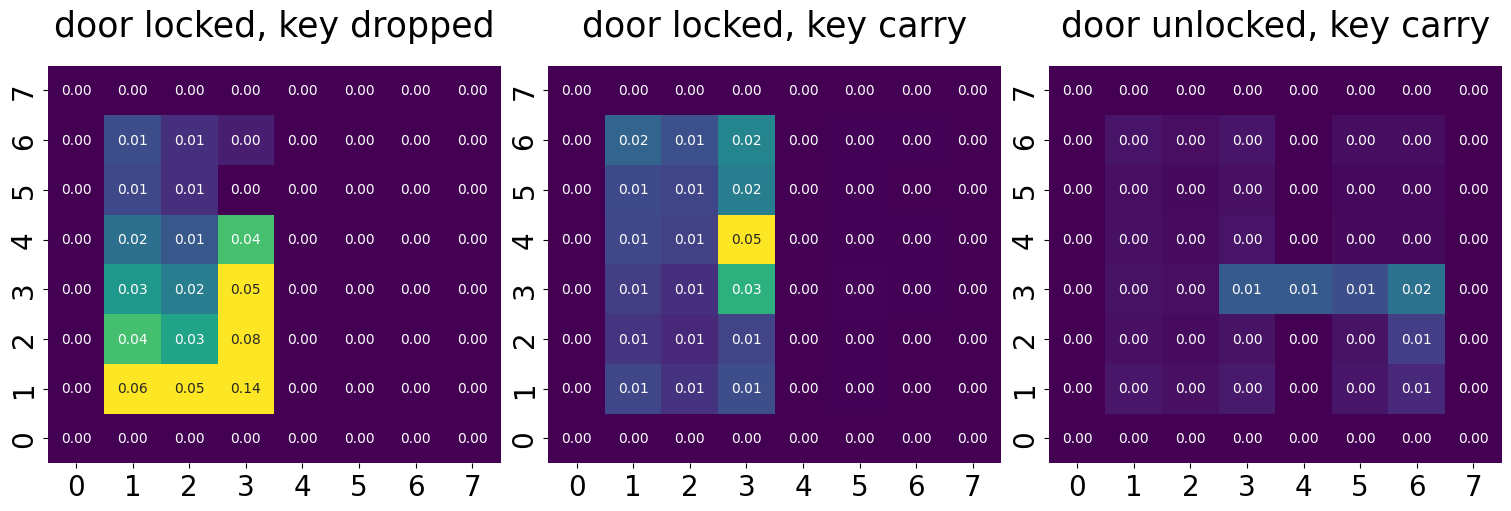

In [106]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Initialize variables
grouped = get_groups(determ_env_df)

n_groups = 3
fig, axes = plt.subplots(1, n_groups, figsize=(5 * n_groups, 5), constrained_layout=True)
titles = ["door locked, key dropped", "door locked, key carry", "door unlocked, key carry"]

# To collect heatmap data for normalization
all_heatmaps = []

for group in grouped:
    group = group[['y_pos', 'x_pos']]
    group = group.to_numpy()

    # Pivot the data for heatmap
    x = group[:, 1]
    y = np.abs(group[:, 0] - 7)
    heatmap, xs, ys = np.histogram2d(x, y, bins=[8, 8], range=[[0, 8], [0, 8]])
    all_heatmaps.append(heatmap)

# Normalize the color range across all heatmaps
vmin = min(h.min() for h in all_heatmaps)
vmax = max(h.max() for h in all_heatmaps)

sum = 0
for i, heatmap in enumerate(all_heatmaps):
    sum += heatmap.sum()

# Plot each heatmap using Seaborn
for i, heatmap in enumerate(all_heatmaps):
    probabilities = heatmap / sum

    sns.heatmap(
        probabilities.T,
        annot=True,  # Add numbers to tiles
        fmt=".2f",   # Format numbers to 2 decimal places
        cmap="viridis",
        cbar=None,
        cbar_ax=None,  # Shared colorbar
        ax=axes[i],
        vmin=0,
        vmax=0.05
    )
    axes[i].set_title(titles[i])
    axes[i].invert_yaxis()  # Invert y-axis to match matrix structure (optional)

plt.show()


# No Reward Visitation

In [107]:
RL_START_STEP = 500000

In [108]:
data_path = '../../sampled_data.csv'
df = pd.read_csv(data_path)
df = df[df['step'] > RL_START_STEP]
df

,x_pos,y_pos,direction,step,carry_key,door_unlocked,codebook_size,filter_size,env_name,ae_model_type,rl_start_step,ae_recon_loss,env_max_steps,count,beta,learning_rate,rm_reward,run_id
500114.0,1,5,1,500039.0,True,False,256,6,minigrid-door-key-stochastic,vqvae,500000,True,1000,True,0.001,0.00003,True,lsls4gmz
500171.0,1,6,1,500096.0,True,False,256,6,minigrid-door-key-stochastic,vqvae,500000,True,1000,True,0.001,0.00003,True,lsls4gmz
500235.0,3,4,2,500160.0,True,False,256,6,minigrid-door-key-stochastic,vqvae,500000,True,1000,True,0.001,0.00003,True,lsls4gmz
500346.0,3,2,0,500271.0,True,False,256,6,minigrid-door-key-stochastic,vqvae,500000,True,1000,True,0.001,0.00003,True,lsls4gmz
500387.0,3,1,2,500312.0,True,False,256,6,minigrid-door-key-stochastic,vqvae,500000,True,1000,True,0.001,0.00003,True,lsls4gmz
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999969.0,2,4,2,999821.0,False,False,256,6,minigrid-door-key-stochastic,vqvae,500000,True,100,True,0.000,0.00003,False,acltcgzd
1000155.0,3,5,1,1000005.0,False,False,256,6,minigrid-door-key-stochastic,vqvae,500000,True,100,True,0.000,0.00003,False,acltcgzd
1000206.0,3,6,1,1000056.0,False,False,256,6,minigrid-door-key-stochastic,vqvae,500000,True,100,True,0.000,0.00003,False,acltcgzd
1000242.0,2,4,0,1000092.0,False,False,256,6,minigrid-door-key-stochastic,vqvae,500000,True,100,True,0.000,0.00003,False,acltcgzd


## First phase

### PPO with count (beta == 0.001)

In [109]:
determ_env_df = df[df['step'] < 600000 ]
determ_env_df = determ_env_df[determ_env_df['beta'] == 0.001]
determ_env_df

,x_pos,y_pos,direction,step,carry_key,door_unlocked,codebook_size,filter_size,env_name,ae_model_type,rl_start_step,ae_recon_loss,env_max_steps,count,beta,learning_rate,rm_reward,run_id
500114.0,1,5,1,500039.0,True,False,256,6,minigrid-door-key-stochastic,vqvae,500000,True,1000,True,0.001,0.00003,True,lsls4gmz
500171.0,1,6,1,500096.0,True,False,256,6,minigrid-door-key-stochastic,vqvae,500000,True,1000,True,0.001,0.00003,True,lsls4gmz
500235.0,3,4,2,500160.0,True,False,256,6,minigrid-door-key-stochastic,vqvae,500000,True,1000,True,0.001,0.00003,True,lsls4gmz
500346.0,3,2,0,500271.0,True,False,256,6,minigrid-door-key-stochastic,vqvae,500000,True,1000,True,0.001,0.00003,True,lsls4gmz
500387.0,3,1,2,500312.0,True,False,256,6,minigrid-door-key-stochastic,vqvae,500000,True,1000,True,0.001,0.00003,True,lsls4gmz
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
599991.0,2,6,1,599903.0,False,False,256,6,minigrid-door-key-stochastic,vqvae,500000,True,1000,True,0.001,0.00003,False,m3omtlt6
599992.0,2,6,1,599904.0,False,False,256,6,minigrid-door-key-stochastic,vqvae,500000,True,1000,True,0.001,0.00003,False,m3omtlt6
600024.0,2,6,2,599936.0,False,False,256,6,minigrid-door-key-stochastic,vqvae,500000,True,1000,True,0.001,0.00003,False,m3omtlt6
600044.0,3,5,0,599956.0,False,False,256,6,minigrid-door-key-stochastic,vqvae,500000,True,1000,True,0.001,0.00003,False,m3omtlt6


124534
200163
105878


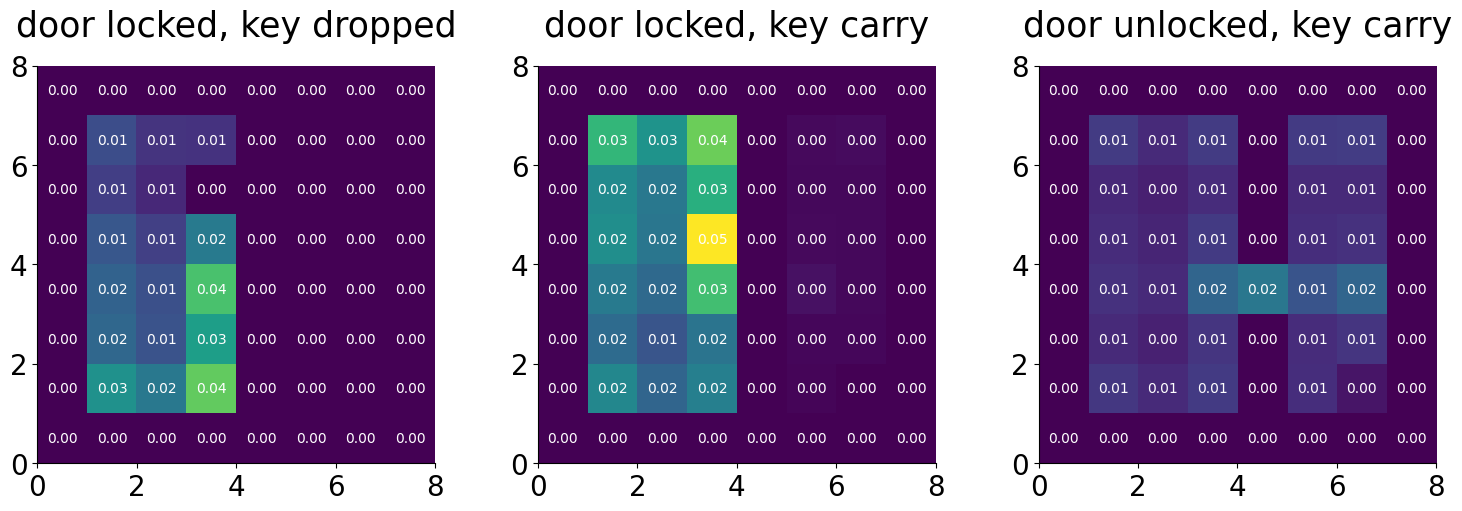

In [110]:
grouped = get_groups(determ_env_df)

x = df['x_pos']
y = df['y_pos']
heatmap, xs, ys = np.histogram2d(x, y, bins=[8, 8], range=[[0, 8], [0, 8]])
heatmap = heatmap.T
max_count = np.max(heatmap)


i = 0
n_groups = 3
fig, axes = plt.subplots(1, n_groups, figsize=(5 * n_groups, 5), constrained_layout=True)
titles = ["door locked, key dropped", "door locked, key carry", "door unlocked, key carry"]

# Calculate the sum for probability
sum = 0
for group in grouped:
    group = group[['y_pos', 'x_pos']]
    group = group.to_numpy()
    
    # Pivot the data for heatmap
    x = group[:, 1]
    y = np.abs(group[:, 0] - 7)
    heatmap, xs, ys = np.histogram2d(x, y, bins=[8, 8], range=[[0, 8], [0, 8]])
    sum += np.sum(heatmap)


for group in grouped:
    print(len(group))
    group = group[['y_pos', 'x_pos']]
    group = group.to_numpy()
    
    # Pivot the data for heatmap
    x = group[:, 1]
    y = np.abs(group[:, 0] - 7)
    heatmap, xs, ys = np.histogram2d(x, y, bins=[8, 8], range=[[0, 8], [0, 8]])

    probabilities = heatmap / sum


    h = axes[i].imshow(
        probabilities.T,  # Transpose to match heatmap orientation
        interpolation='nearest',
        origin='lower',
        extent=[0, 8, 0, 8],
        cmap='viridis',
        vmin=0,
        vmax=0.05
    )

    for row in range(probabilities.shape[0]):
        for col in range(probabilities.shape[1]):
            axes[i].text(
                col + 0.5, row + 0.5,  # Position in the center of the cell
                f"{probabilities[col, row]:.2f}",  # Format probability
                ha='center', va='center', color='white'
            )
    
    axes[i].set_title(titles[i])    

    i += 1
    if i >= n_groups:
        break



    # the actual x-axis and y-axis are from 0 to 19
    # we want to put 11 ticks on the axis
    # ax.set_xticks(np.linspace(0,7, 8))
    # ax.set_yticks(np.linspace(0,7, 8))

# fig.colorbar(h, ax=axes)

plt.show()

### PPO

In [111]:
determ_env_df = df[df['step'] < 600000 ]
determ_env_df = determ_env_df[determ_env_df['beta'] == 0.0]
determ_env_df

,x_pos,y_pos,direction,step,carry_key,door_unlocked,codebook_size,filter_size,env_name,ae_model_type,rl_start_step,ae_recon_loss,env_max_steps,count,beta,learning_rate,rm_reward,run_id
500247.0,3,3,3,500172.0,True,True,256,6,minigrid-door-key-stochastic,vqvae,500000,True,1000,True,0.0,0.00030,True,mejkdwhp
500287.0,1,3,0,500212.0,True,True,256,6,minigrid-door-key-stochastic,vqvae,500000,True,1000,True,0.0,0.00030,True,mejkdwhp
500291.0,1,4,1,500216.0,True,True,256,6,minigrid-door-key-stochastic,vqvae,500000,True,1000,True,0.0,0.00030,True,mejkdwhp
500372.0,3,5,1,500297.0,True,False,256,6,minigrid-door-key-stochastic,vqvae,500000,True,1000,True,0.0,0.00030,True,mejkdwhp
500749.0,3,6,3,500674.0,True,True,256,6,minigrid-door-key-stochastic,vqvae,500000,True,1000,True,0.0,0.00030,True,mejkdwhp
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
599083.0,1,6,2,598995.0,False,False,256,6,minigrid-door-key-stochastic,vqvae,500000,True,100,True,0.0,0.00003,False,acltcgzd
599153.0,2,5,1,599065.0,False,False,256,6,minigrid-door-key-stochastic,vqvae,500000,True,100,True,0.0,0.00003,False,acltcgzd
599827.0,3,6,3,599739.0,False,False,256,6,minigrid-door-key-stochastic,vqvae,500000,True,100,True,0.0,0.00003,False,acltcgzd
599895.0,1,4,2,599807.0,False,False,256,6,minigrid-door-key-stochastic,vqvae,500000,True,100,True,0.0,0.00003,False,acltcgzd


433293
200619
70615


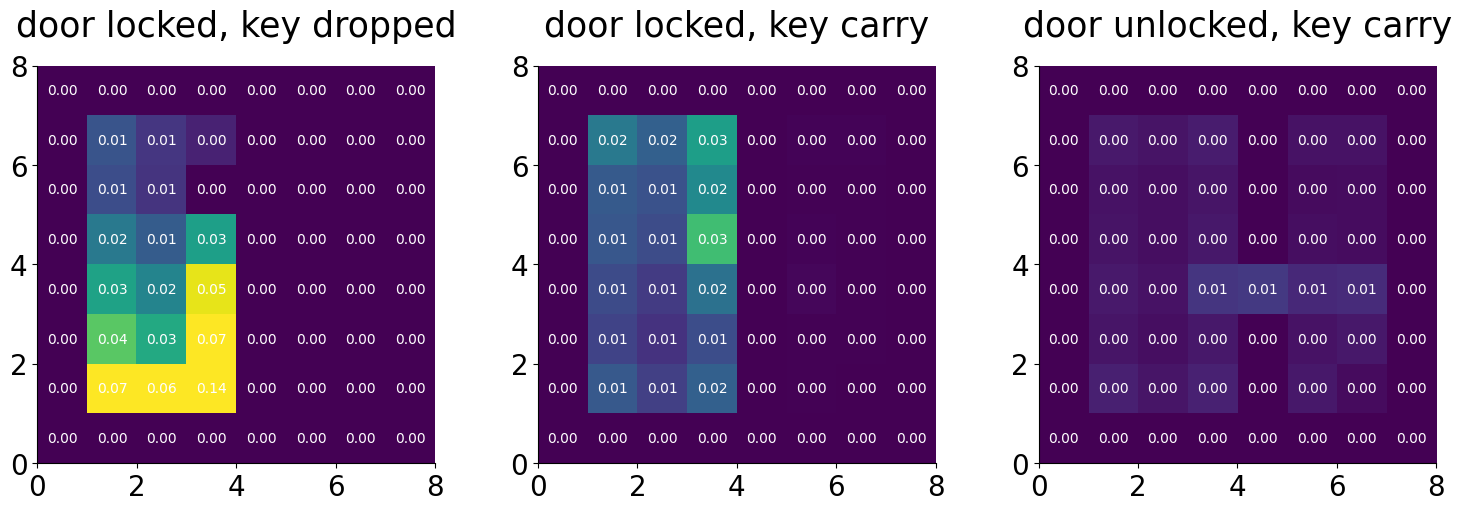

In [112]:
grouped = get_groups(determ_env_df)

x = df['x_pos']
y = df['y_pos']
heatmap, xs, ys = np.histogram2d(x, y, bins=[8, 8], range=[[0, 8], [0, 8]])
heatmap = heatmap.T
max_count = np.max(heatmap)


i = 0
n_groups = 3
fig, axes = plt.subplots(1, n_groups, figsize=(5 * n_groups, 5), constrained_layout=True)
titles = ["door locked, key dropped", "door locked, key carry", "door unlocked, key carry"]

# Calculate the sum for probability
sum = 0
for group in grouped:
    group = group[['y_pos', 'x_pos']]
    group = group.to_numpy()
    
    # Pivot the data for heatmap
    x = group[:, 1]
    y = np.abs(group[:, 0] - 7)
    heatmap, xs, ys = np.histogram2d(x, y, bins=[8, 8], range=[[0, 8], [0, 8]])
    sum += np.sum(heatmap)


for group in grouped:
    print(len(group))
    group = group[['y_pos', 'x_pos']]
    group = group.to_numpy()
    
    # Pivot the data for heatmap
    x = group[:, 1]
    y = np.abs(group[:, 0] - 7)
    heatmap, xs, ys = np.histogram2d(x, y, bins=[8, 8], range=[[0, 8], [0, 8]])

    probabilities = heatmap / sum


    h = axes[i].imshow(
        probabilities.T,  # Transpose to match heatmap orientation
        interpolation='nearest',
        origin='lower',
        extent=[0, 8, 0, 8],
        cmap='viridis',
        vmin=0,
        vmax=0.05
    )

    for row in range(probabilities.shape[0]):
        for col in range(probabilities.shape[1]):
            axes[i].text(
                col + 0.5, row + 0.5,  # Position in the center of the cell
                f"{probabilities[col, row]:.2f}",  # Format probability
                ha='center', va='center', color='white'
            )
    
    axes[i].set_title(titles[i])    

    i += 1
    if i >= n_groups:
        break



    # the actual x-axis and y-axis are from 0 to 19
    # we want to put 11 ticks on the axis
    # ax.set_xticks(np.linspace(0,7, 8))
    # ax.set_yticks(np.linspace(0,7, 8))

# fig.colorbar(h, ax=axes)

plt.show()

# Door and key Hit diagram

In [113]:
data_path = '../../discrete-mbrl-model-free-no-reward_data.csv'
df = pd.read_csv(data_path)
df = df[df['step'] > RL_START_STEP]
df

,step,y_pos,x_pos,carry_key,door_unlocked,beta,run_id
500050,500001,5,1,True,True,0.000,qekmipus
500051,500002,5,1,True,True,0.000,qekmipus
500052,500003,5,1,True,True,0.000,qekmipus
500053,500004,5,1,True,True,0.000,qekmipus
500054,500005,5,1,True,True,0.000,qekmipus
...,...,...,...,...,...,...,...
27014737,500219,3,1,True,False,0.001,ruqtmbcm
27014738,500220,4,1,True,False,0.001,ruqtmbcm
27014739,500221,4,1,True,False,0.001,ruqtmbcm
27014740,500222,4,1,True,False,0.001,ruqtmbcm


In [114]:
df["door_unlocked"] = df["door_unlocked"].astype(int)
df["carry_key"] = df["carry_key"].astype(int)


df["carry_key_count"] = df.groupby("run_id")["carry_key"].cumsum()
df["door_unlocked"] = df.groupby("run_id")["door_unlocked"].cumsum()


df

,step,y_pos,x_pos,carry_key,door_unlocked,beta,run_id,carry_key_count
500050,500001,5,1,1,1,0.000,qekmipus,1
500051,500002,5,1,1,2,0.000,qekmipus,2
500052,500003,5,1,1,3,0.000,qekmipus,3
500053,500004,5,1,1,4,0.000,qekmipus,4
500054,500005,5,1,1,5,0.000,qekmipus,5
...,...,...,...,...,...,...,...,...
27014737,500219,3,1,1,0,0.001,ruqtmbcm,219
27014738,500220,4,1,1,0,0.001,ruqtmbcm,220
27014739,500221,4,1,1,0,0.001,ruqtmbcm,221
27014740,500222,4,1,1,0,0.001,ruqtmbcm,222


In [115]:

df["step_bin"] = (df["step"] // 1000 + 1) * 1000  # Floors to the nearest 1,000
df_binned = df.groupby(['run_id', 'beta', 'step_bin'], as_index=False)[["carry_key_count", 'door_unlocked']].mean()

# print(df_binned)
df_binned


,run_id,beta,step_bin,carry_key_count,door_unlocked
0,24muhafp,0.001,501000,0.000000,0.000000
1,2dd5er8h,0.000,501000,112.000000,0.000000
2,3dgew7ao,0.001,501000,112.000000,0.000000
3,48ho1go4,0.001,501000,112.000000,20.022422
4,4tt8di76,0.001,501000,7.156951,0.000000
5,5cr4nm9d,0.000,501000,112.000000,0.000000
6,6rmrtnts,0.000,501000,112.000000,102.565022
7,8b0gfjj7,0.001,501000,112.000000,83.085202
8,8qwnpi24,0.001,501000,95.408072,0.000000
9,8xaodcmg,0.000,501000,0.000000,0.000000


      run_id   beta  step_bin  carry_key_count  door_unlocked
0   24muhafp  0.001    501000         0.000000       0.000000
1   2dd5er8h  0.000    501000       112.000000       0.000000
2   3dgew7ao  0.001    501000       112.000000       0.000000
3   48ho1go4  0.001    501000       112.000000      20.022422
4   4tt8di76  0.001    501000         7.156951       0.000000
5   5cr4nm9d  0.000    501000       112.000000       0.000000
6   6rmrtnts  0.000    501000       112.000000     102.565022
7   8b0gfjj7  0.001    501000       112.000000      83.085202
8   8qwnpi24  0.001    501000        95.408072       0.000000
9   8xaodcmg  0.000    501000         0.000000       0.000000
10  9r08h0ig  0.000    501000        53.399103       0.000000
11  a2d67grc  0.001    501000       112.000000       0.000000
12  aia7eh4u  0.000    501000        96.614350       0.000000
13  behgykei  0.001    501000        59.641256      59.170404
14  bu15jd2j  0.000    501000       112.000000       0.000000
15  cv3f

/var/folders/29/w5w0jfxj159bsbfcwqj2081m0000gn/T/ipykernel_99251/2661026724.py:29: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  plt.xlim(rl_start_step, max_step)


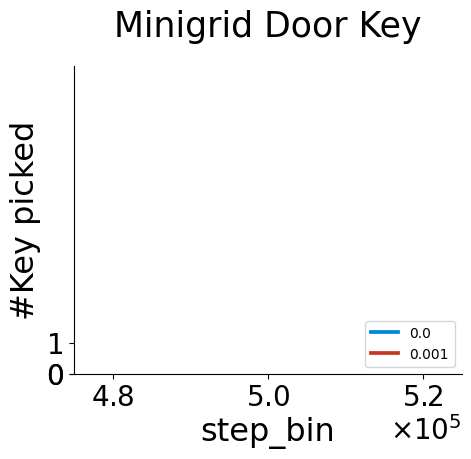

In [116]:
label_map = {0.0: "PPO", 0.001: "beta = 0.001", 0.01: "beta = 0.01", 0.0001: "beta = 0.0001"}

determ_env_df = df_binned

print(determ_env_df)



set_matplotlib_style(style='4-row')

env_name = "Minigrid Door Key"
group = determ_env_df

group['beta_label'] = group['beta'].map(label_map)

rl_start_step = RL_START_STEP
max_step = 5e5

len_classes = 2
color_palette = get_color_palette(n=len_classes)
sns.lineplot(
    group, x='step_bin', y='carry_key_count', hue='beta',
    errorbar=t_distrib, palette=color_palette)
  
#   plt.axvline(x=rl_start_step, color='black', linestyle='--', alpha=0.3, linewidth=2)
  
plt.title(f'{standardize_env_name(env_name)}')
set_fig_labels('Time Steps', '#Key picked', xsci=True)
plt.xlim(rl_start_step, max_step)
  
max_y = 1
plt.ylim(0, 10)
plt.gca().set_yticks([0, max_y // 2, max_y])
plt.legend(loc='lower right')





save_fig_versions(f'{standardize_env_name(env_name)}_delayed_rl_ep_len', type='png',dir='../../../figures/png')
plt.show()

      run_id   beta  step_bin  carry_key_count  door_unlocked    beta_label
0   24muhafp  0.001    501000         0.000000       0.000000  beta = 0.001
1   2dd5er8h  0.000    501000       112.000000       0.000000           PPO
2   3dgew7ao  0.001    501000       112.000000       0.000000  beta = 0.001
3   48ho1go4  0.001    501000       112.000000      20.022422  beta = 0.001
4   4tt8di76  0.001    501000         7.156951       0.000000  beta = 0.001
5   5cr4nm9d  0.000    501000       112.000000       0.000000           PPO
6   6rmrtnts  0.000    501000       112.000000     102.565022           PPO
7   8b0gfjj7  0.001    501000       112.000000      83.085202  beta = 0.001
8   8qwnpi24  0.001    501000        95.408072       0.000000  beta = 0.001
9   8xaodcmg  0.000    501000         0.000000       0.000000           PPO
10  9r08h0ig  0.000    501000        53.399103       0.000000           PPO
11  a2d67grc  0.001    501000       112.000000       0.000000  beta = 0.001
12  aia7eh4u

/var/folders/29/w5w0jfxj159bsbfcwqj2081m0000gn/T/ipykernel_99251/2116197759.py:29: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  plt.xlim(rl_start_step, max_step)


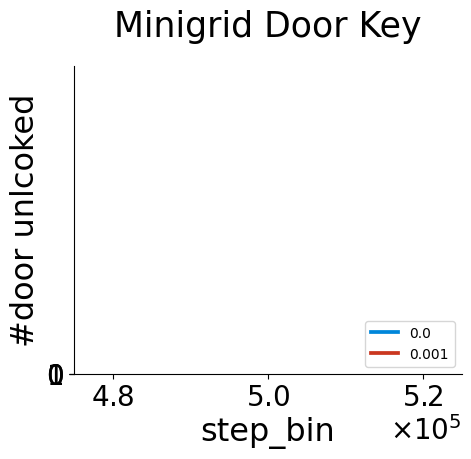

In [117]:
label_map = {0.0: "PPO", 0.001: "beta = 0.001", 0.01: "beta = 0.01", 0.0001: "beta = 0.0001"}

determ_env_df = df_binned

print(determ_env_df)



set_matplotlib_style(style='4-row')

env_name = "Minigrid Door Key"
group = determ_env_df

group['beta_label'] = group['beta'].map(label_map)

rl_start_step = RL_START_STEP
max_step = 5e5

len_classes = 2
color_palette = get_color_palette(n=len_classes)
sns.lineplot(
    group, x='step_bin', y='door_unlocked', hue='beta',
    errorbar=t_distrib, palette=color_palette)
  
#   plt.axvline(x=rl_start_step, color='black', linestyle='--', alpha=0.3, linewidth=2)
  
plt.title(f'{standardize_env_name(env_name)}')
set_fig_labels('Time Steps', '#door unlcoked', xsci=True)
plt.xlim(rl_start_step, max_step)
  
max_y = 1
plt.ylim(0, 2e5)
plt.gca().set_yticks([0, max_y // 2, max_y])
plt.legend(loc='lower right')





save_fig_versions(f'{standardize_env_name(env_name)}_delayed_rl_ep_len', type='png',dir='../../../figures/png')
plt.show()